<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanMelendres/blob/main/Actividad_Semanal_7_Regresiones_y_K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 7 Regresiones y K means**

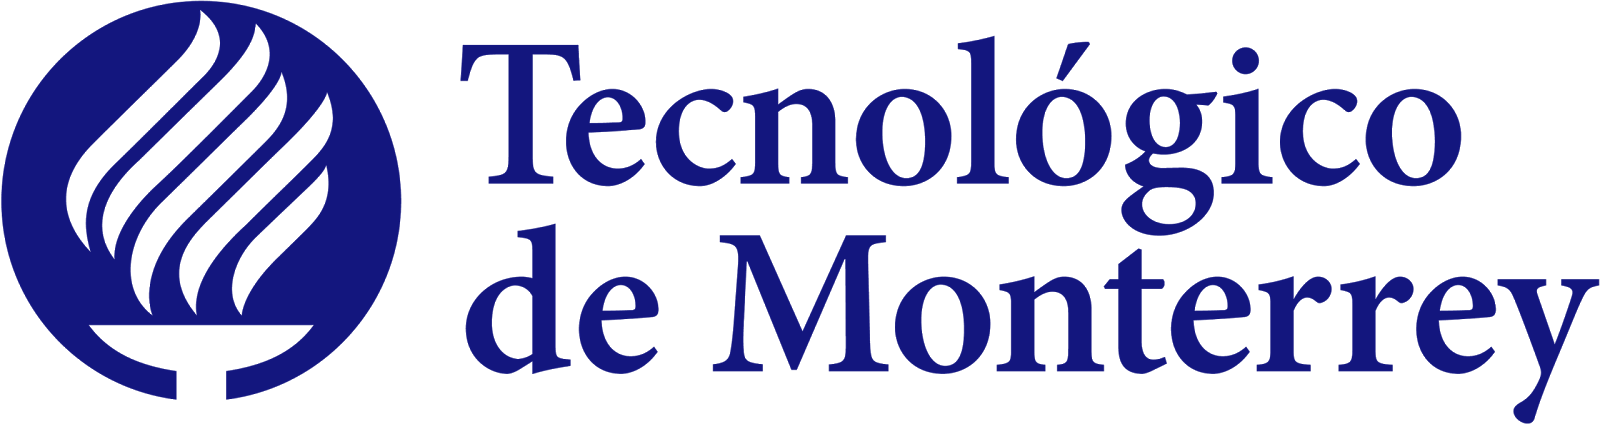

*   **Alumno:** Juan Antonio Melendres Villa
*   **Matrícula:** A00369017
*   **Materia:** Ciencia y analítica de datos (Gpo 10)
*   **Profesor:** María de la Paz Rico Fernández.
*   **Fecha:** 09 de Noviembre de 2022

# **Notebook 1. Regresión.** 

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [3]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

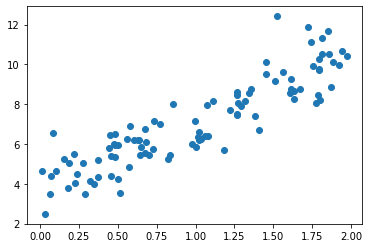

In [4]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [5]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [6]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

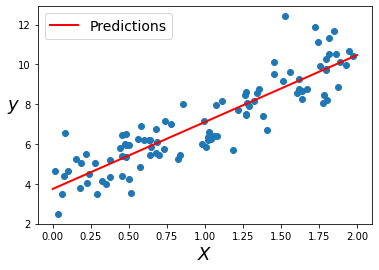

In [7]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [8]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [9]:
X_new.shape

(2, 1)

In [10]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [11]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [12]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [13]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

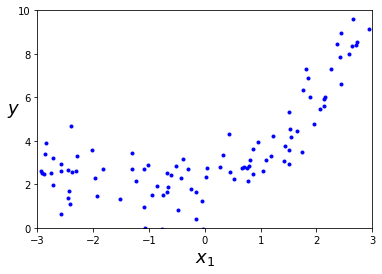

In [14]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [16]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [17]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [18]:
print(X[0])
print(X[0]*X[0])

[2.72919168]
[7.44848725]


In [19]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [20]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

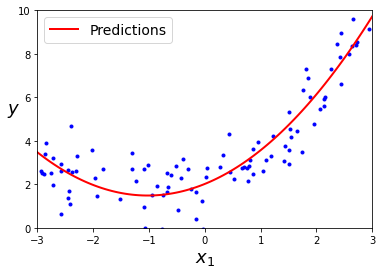

In [21]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [22]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [23]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [24]:
len(X)

1000

In [25]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

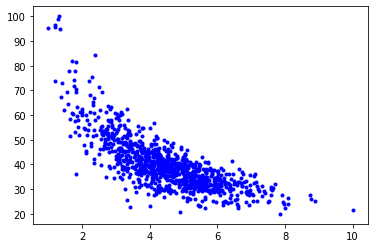

In [26]:
plt.plot(X, y, 'b.')

Este notebook ya lo vimos en clase, sin embargo solo le aplicamos regresión lineal y polinomial al ejercicio 1. Ahora realizarás lo siguiente:

Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

    Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
    Regresión Lineal.
        Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
    Regresión Polinomial.
        Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
    Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
    Finalmente grafica :
        MAE (de los cuatro métodos)
        R2 (de los cuatro métodos)
    Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


1. **Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

2. **Regresión Lineal.**

    **Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline, Pipeline

pipeLinear = Pipeline([('regresor',LinearRegression(fit_intercept=True))])
pipeLinear.fit(X_train,y_train)
pipeLinear['regresor'].coef_, pipeLinear['regresor'].intercept_

(array([-6.14066196]), 67.51071463726647)

Con los componentes calculados, la ecuación lineal sería: 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


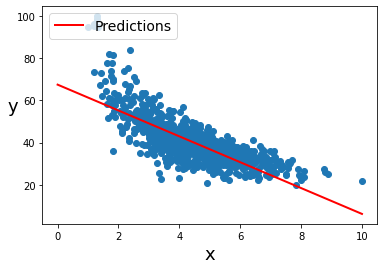

In [29]:
X_fit = np.linspace(0, 10, 100)
y_fit = pipeLinear.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("x", fontsize = 18)
plt.ylabel("y", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)

In [30]:
from sklearn.metrics import mean_absolute_error, r2_score

yhat = pipeLinear.predict(X_test)
print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test, yhat))
print('-----------------R_Square--------------')
print(r2_score(y_test, yhat))

-----------------Error medio Absoluto (MAE)--------------
4.476124068321028
-----------------R_Square--------------
0.6171546016469538


3. **Regresión Polinomial.**

    **Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**


In [31]:
from sklearn.preprocessing import PolynomialFeatures

pipePoly = Pipeline([('poly', PolynomialFeatures(degree = 4, include_bias = False)), ('regresor', LinearRegression(fit_intercept = True))])
pipePoly.fit(X_train, y_train)
pipePoly['regresor'].coef_, pipePoly['regresor'].intercept_

(array([-5.67857127e+01,  1.28533740e+01, -1.35980216e+00,  5.33375344e-02]),
 135.04703064864705)

La ecuación de segundo orden quedaría:

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


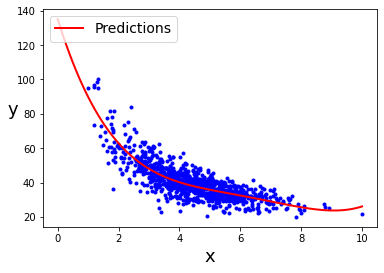

In [32]:
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipePoly.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("x", fontsize = 18)
plt.ylabel("y", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)

In [33]:
yhat = pipePoly.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test, yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test, yhat))

-----------------Error medio Absoluto (MAE)--------------
4.1545953457818765
-----------------R_Square--------------
0.6502022822575972


4. **Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

In [34]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

pipeRidge = Pipeline([('poly', PolynomialFeatures(degree = 10, include_bias = False)), ('scalar', StandardScaler(),), ('regresor', Ridge(alpha = 5))])

pipeRidge.fit(X_train, y_train)
pipeRidge['regresor'].coef_, pipeRidge['regresor'].intercept_

(array([-17.91979501,   2.37518316,   6.89496961,   4.49242708,
          0.63008552,  -2.0400781 ,  -2.78606476,  -1.91892124,
         -0.08293923,   2.14668284]), 40.08050864703529)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


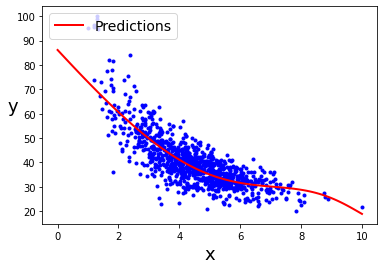

In [35]:
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipeRidge.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("x", fontsize = 18)
plt.ylabel("y", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)

In [36]:
yhat = pipeRidge.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test, yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test, yhat))

-----------------Error medio Absoluto (MAE)--------------
4.120156088702861
-----------------R_Square--------------
0.6639872732779191


In [37]:
pipeLasso = Pipeline([('poly',PolynomialFeatures(degree = 10, include_bias = False)), ('scalar', StandardScaler(),), ('regresor', Lasso(alpha = 0.1))])

pipeLasso.fit(X_train, y_train)
pipeLasso['regresor'].coef_, pipeRidge['regresor'].intercept_

(array([-15.31505304,   0.        ,   8.39521278,   0.        ,
          0.        ,  -0.        ,  -0.        ,  -0.        ,
         -1.19592108,  -0.        ]), 40.08050864703529)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


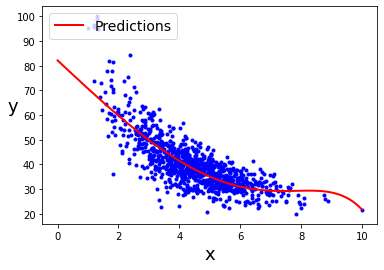

In [38]:
X_fit = np.linspace(0, 10, 100).reshape(100, 1)
y_fit = pipeLasso.predict(X_fit)
plt.plot(X, y, "b.")
plt.plot(X_fit, y_fit, "r-", linewidth = 2, label = "Predictions")
plt.xlabel("x", fontsize = 18)
plt.ylabel("y", rotation = 0, fontsize = 18)
plt.legend(loc = "upper left", fontsize = 14)

In [39]:
yhat = pipeLasso.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test,yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------Error medio Absoluto (MAE)--------------
4.144909623917414
-----------------R_Square--------------
0.6640343338331574


5. **Finalmente grafica:**

    **MAE (de los cuatro métodos)**
    **R2 (de los cuatro métodos)**

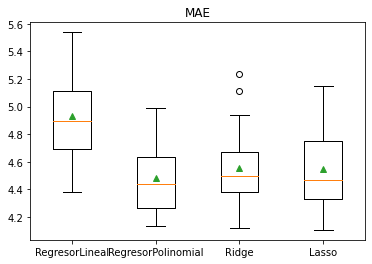

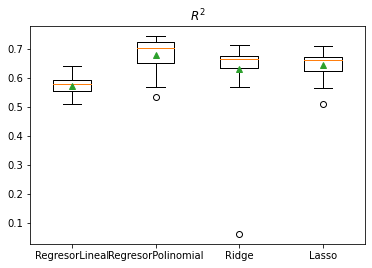

In [40]:
from sklearn.model_selection import  cross_validate,  RepeatedKFold
from sklearn.metrics import make_scorer


misModelos = {'RegresorLineal': pipeLinear, 'RegresorPolinomial': pipePoly, 'Ridge': pipeRidge, 'Lasso': pipeLasso}

kf = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 7)

misMAEs = {}
misRSquares = {}

for nombre, modelo in misModelos.items():
    misMAEs[nombre] = cross_validate(modelo, X, y, cv = kf, scoring = make_scorer(mean_absolute_error))['test_score']
    misRSquares[nombre] = cross_validate(modelo, X, y, cv = kf, scoring = make_scorer(r2_score))['test_score']


plt.boxplot(misMAEs.values(), labels = misMAEs.keys(), showmeans = True)
plt.title('MAE')
plt.show()

plt.boxplot(misRSquares.values(), labels = misRSquares.keys(), showmeans = True)
plt.title('$R^2$')
plt.show()

6. **Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**

Está claro que el modelo con peor rendimiento es el lineal, con solo mirar los datos podemos concluir que no sigue una línea recta. Según los datos que tenemos, tomaría el modelo polinomial de cuarto grado, es el más eficiente y menos complejo que los modelos Ridge y Lasso de grado más alto. También podemos ver en los gráficos de error que se comporta de manera más consistente con diferentes conjuntos de datos (sin valores atípicos como Ridge y Lasso).

Podemos usar curvas de aprendizaje para determinar la combinación de entrenamiento y validación y medir el desempeño a medida que cambian los porcentajes de la mezcla.

El error del modelo es: MAE: 4.15 y el score R^2 es: 0.65

Un modelo se puede considerar bueno a partir de un R^2 de 0.6, así que el modelo lo considero como bueno.

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [41]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13104,546000865,20140919T000000,556000.0,3,1.00,1800,4005,1.5,0,0,...,7,1160,640,1929,0,98117,47.6876,-122.380,1240,4005
3256,540100057,20150428T000000,1208000.0,4,3.75,3250,10949,2.0,0,0,...,9,2940,310,1930,1989,98004,47.6390,-122.219,2340,15234
8081,7205500120,20150423T000000,280400.0,4,1.75,1730,7210,1.0,0,0,...,7,1010,720,1968,0,98003,47.3540,-122.315,1620,7210
18042,9407001770,20150512T000000,304950.0,3,1.75,1350,9000,1.0,0,0,...,7,1350,0,1987,0,98045,47.4487,-121.773,1370,9500
17992,9542890100,20141229T000000,415000.0,2,2.25,1130,2191,2.0,0,0,...,8,1130,0,2010,0,98052,47.6861,-122.103,1140,1710
5584,8656300380,20140506T000000,272000.0,3,2.50,1650,13816,2.0,0,0,...,7,1650,0,1998,0,98014,47.6553,-121.912,1650,15144
221,7138000260,20140605T000000,279950.0,3,2.00,1750,9750,1.0,0,0,...,7,1350,400,1961,0,98198,47.3980,-122.299,1900,10125
11400,1402950240,20140602T000000,300000.0,4,2.50,2070,7476,2.0,0,0,...,8,2070,0,2003,0,98092,47.3352,-122.189,2430,5500
8743,6126601445,20140530T000000,490000.0,3,1.75,1920,5405,1.0,0,2,...,7,960,960,1947,0,98126,47.5583,-122.380,1190,5405
19913,7207900030,20140609T000000,400000.0,4,3.50,2370,3692,2.5,0,0,...,8,2370,0,2013,0,98056,47.5044,-122.170,2520,5425


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [43]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [44]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)

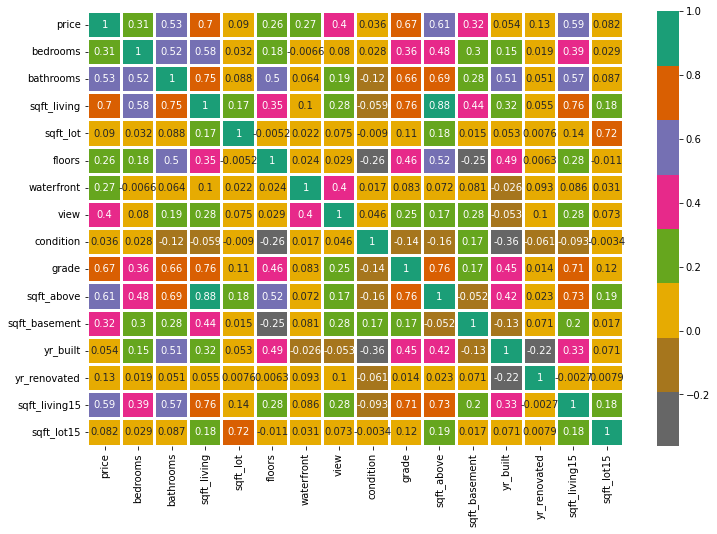

In [45]:
plt.figure(figsize = (12,8)) 
sns.heatmap(df.corr(), annot = True, cmap = 'Dark2_r', linewidths = 2)
plt.show()

In [46]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Ejercicio 2. Regresión múltiple.

Encuentra el mejor regresor para los datos de las casas:

* Divide los datos. Utiliza la función train_test_split (ya esta en el notebook.
* Regresión Múltiple Lineal.
* Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* Regresión Múltiple Polinomial.
* Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
* Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
* Finalmente grafica :
      MAE (de los cuatro métodos)
      R2 (de los cuatro métodos)
* Explica tus resultados, que método se aproxima mejor, ¿por que?, ¿que porcentajes de entrenamiento y evaluación? ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?
* Agrega las conclusiones



1. **Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).**

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

2. **Regresión Múltiple Lineal.**

    **Realiza la regresión lineal: modelo generado (ecuación), sus errores y r cuadrada.**


In [49]:
pipeLinear = Pipeline([('regresor', LinearRegression(fit_intercept = True))])
pipeLinear.fit(X_train, y_train)
pipeLinear['regresor'].coef_, pipeLinear['regresor'].intercept_

(array([[-3.82008048e+04,  4.14661380e+04,  1.07992584e+02,
          1.71356997e-02,  3.16916913e+04,  5.52691023e+05,
          4.12493228e+04,  2.12221443e+04,  1.19493216e+05,
          4.77750271e+01,  6.02175565e+01, -3.55090216e+03,
          1.32602215e+01,  2.90059284e+01, -5.48132603e-01]]),
 array([6151359.2627409]))

In [50]:
yhat = pipeLinear.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test,yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------Error medio Absoluto (MAE)--------------
137480.1388273178
-----------------R_Square--------------
0.6579723205007814


3. **Regresión Múltiple Polinomial.**

    **Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.**

In [51]:
pipePoly = Pipeline([('poly', PolynomialFeatures(degree = 2, include_bias = False)), ('scalar', StandardScaler(),), ('regresor', LinearRegression(fit_intercept = True))])
pipePoly.fit(X_train, y_train)
print('Los coeficientes son:')
for c in pipePoly['regresor'].coef_[0]:
    print(c)
print('el bias es: ',pipeLinear['regresor'].intercept_)

Los coeficientes son:
871970.1796301178
-840473.5942669313
489773777374153.2
-1152061.697169613
-1114926.700652256
57241959988875.05
-221414.64441963827
363291.8754030798
1292907.485583766
-441217496971885.56
-236871954327040.56
-2519878.586960898
-1190988.0124088333
2740163.1795005975
-929361.3437970001
9822.124816490279
31788.800803866092
556665163988724.75
-2748.102817362931
21212.18315650907
-3432.9050380031404
-893.0013751286897
-21089.1828420088
-50479.11366279733
-474633628365836.06
-214276135743863.94
-864611.581426224
-13385.99898417858
63027.40496029316
20657.691309263588
-35562.28986838568
-2946482760409829.0
-15346.50974748638
-53721.6953125
10660.3125
8241.0234375
-3091.9921875
182851.6484375
2519191697095810.0
956279638106868.6
778233.21875
-17066.8125
-50896.185546875
-4325.328125
-647469779365159.2
-1081577245032508.5
3520528161238970.0
-1.0058824085013134e+16
1.8234450265794304e+16
4926490140620967.0
-2882161454349961.5
1249430253787256.2
3.304887534650617e+16
19663416

In [52]:
yhat = pipePoly.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test,yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test,yhat))

-----------------Error medio Absoluto (MAE)--------------
121306.3696141217
-----------------R_Square--------------
0.7797762652531899


4. **Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, errores y r cuadrada.**

**Ridge**

In [53]:
pipeRidge = Pipeline([('poly', PolynomialFeatures(degree = 4, include_bias = False)), ('scalar', StandardScaler(),) ,('regresor', Ridge(alpha = 5, tol = 0.1))])

pipeRidge.fit(X_train, y_train)
for c in pipeRidge['regresor'].coef_[0]:
    print(c)
print('el bias es: ',pipeRidge['regresor'].intercept_)

63934.89470104554
-12375.911867797624
22579.29278372621
-38419.81965465488
-69387.24584789622
-3529.1301216352517
37029.00223057131
28350.417681808853
138657.54882843117
30790.473844864773
-10666.312423180087
-165573.7583326304
-46341.13578920248
172144.30650144615
-78005.51427761135
50047.74972687574
-16148.957268645201
-10720.70213281909
-34974.52344239619
17473.268939440804
-22675.61822184759
17988.45905845435
69083.41801942301
54502.61906174507
-17106.02648628661
10039.634142784023
-2566.4715840057625
-33608.4657960607
90123.35515277227
-44798.053973877024
-74376.56109421325
-44390.84081217377
5764.525741358728
-54267.148061390486
-28491.616147590972
-421.08113293835123
28104.445517031232
-41187.355947612035
-51842.478308318256
-204.65381059735253
574.7395903114315
-47529.9785095086
22897.736085318273
-18528.96559236016
-35102.353956127125
-6474.631580648821
-50322.78166857453
-9542.721633868516
-6856.26553810001
9422.833289270799
10989.166005429566
-34084.73153112711
-21758.203278

In [54]:
yhat = pipeRidge.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test, yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test, yhat))

-----------------Error medio Absoluto (MAE)--------------
127765.95725514727
-----------------R_Square--------------
0.4825934570914038


**Lasso**

In [55]:
pipeLasso = Pipeline([('poly', PolynomialFeatures(degree = 4, include_bias = False)), ('scalar', StandardScaler(),), ('regresor', Lasso(alpha = .01, tol = 0.1, max_iter = 10000))])
pipeLasso.fit(X_train, y_train)
pipeLasso['regresor'].coef_,pipeLasso['regresor'].intercept_

(array([259604.34891066,   3026.11933129, 181124.85014297, ...,
           565.22216791,  25266.62517535,  36314.30265792]),
 array([539150.7367232]))

In [56]:
yhat = pipeLasso.predict(X_test)

print('-----------------Error medio Absoluto (MAE)--------------')
print(mean_absolute_error(y_test, yhat))

print('-----------------R_Square--------------')
print(r2_score(y_test, yhat))

-----------------Error medio Absoluto (MAE)--------------
127977.2507131452
-----------------R_Square--------------
0.5072637272213432


5. **Finalmente gráfica:**

    **MAE (de los cuatro métodos)**
    **R2 (de los cuatro métodos)**

In [58]:
modelos = {'RegresorLineal': pipeLinear, 'RegresorPolinomial': pipePoly, 'Ridge': pipeRidge, 'Lasso': pipeLasso}

kf = RepeatedKFold(n_splits = 5, n_repeats = 5, random_state = 7)

MAEs = {}
RSquares = {}

for nombre, modelo in modelos.items():
    MAEs[nombre] = cross_validate(modelo, X, y, cv = kf, n_jobs = -1, scoring = make_scorer(mean_absolute_error))['test_score']
    RSquares[nombre] = cross_validate(modelo, X, y, cv = kf, n_jobs = -1, scoring = make_scorer(r2_score))['test_score']

plt.boxplot(MAEs.values(), labels = MAEs.keys(), showmeans = True)
plt.title('MAE')
plt.show()

plt.boxplot(RSquares.values(), labels = RSquares.keys(), showmeans = True)
plt.title('$R^2$')
plt.show()

KeyboardInterrupt: ignored

6. **Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**

En este caso, los modelos Ridge y Lasso funcionaron muy mal, eso se debe al costo computacional, computacionalmente, el entrenamiento de Ridge o Lasso es mayor que para polinomios, Lasso y Ridge funcionan mejor para polinomios de orden superior. Por otro lado, la regresión polinomial de cuarto orden funcionó bien y sigue siendo un modelo más simple, por lo que también elegiría el polinomio de cuarto orden. 
El MEE de este modelo es: 12131.96 y el R^2 score es 0.78

# **Notebook 2. K means.** 

Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [59]:
!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 59.7 MB/s 
     |████████████████████████████████| 1.0 MB 57.6 MB/s 
     |████████████████████████████████| 1.7 MB 64.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 54.5 MB/s 
     |████████████████████████████████| 6.3 MB 60.3 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=a4623ad682ea9a902775401bc4eae156ddebb001149d216430f1fbf60acc95c5
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=a6a1cbb526cf33027a12ff6b056207605b2cf53cf1a3da571af2f0531ccc43b3
  Stored in directory: /root/

In [60]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [61]:
url = "https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df = pd.read_csv(url)

Exploremos los datos.

In [62]:
df.head()

,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [64]:
latlong = df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

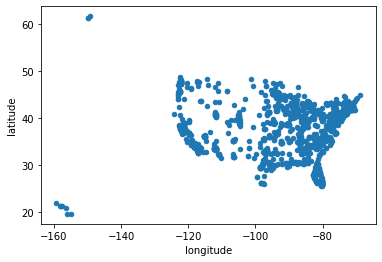

In [65]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [66]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [67]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [68]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [69]:
gdf = gpd.GeoDataFrame(df, geometry = "Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [70]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [71]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

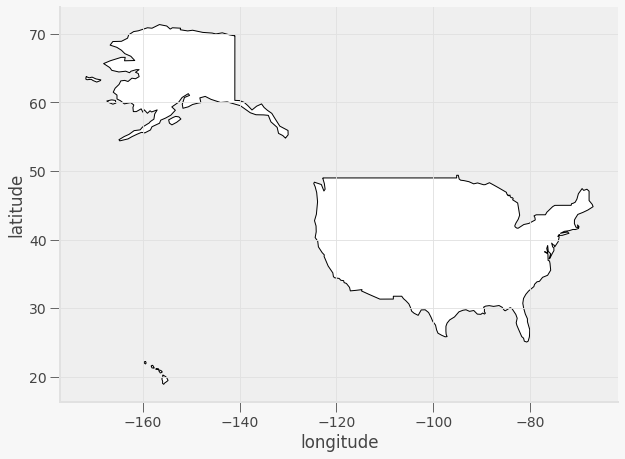

In [72]:
fig, gax = plt.subplots(figsize = (10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor = 'black', color = 'white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

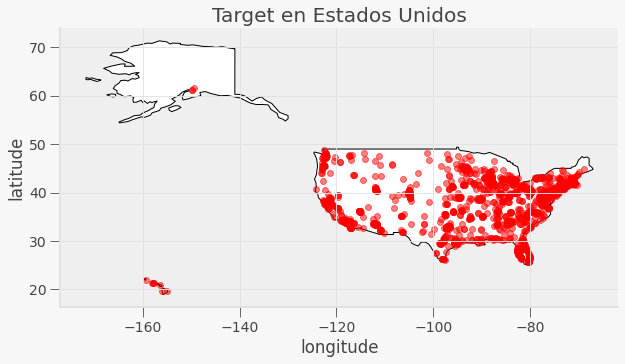

In [73]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize = (10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor = 'black', color = 'white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax = gax, color = 'red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

1. **Encuentra el numero ideal de almacenes, justifica tu respuesta:**

    Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estara?
    ¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?

In [74]:
X = latlong
X

,latitude,longitude
0,33.224225,-86.804174
1,33.334550,-86.989778
2,30.602875,-87.895932
3,34.560148,-86.971559
4,31.266061,-85.446422
...,...,...
1834,43.034293,-88.176840
1835,42.989604,-88.259806
1836,42.846799,-106.264166
1837,41.162019,-104.800048


In [75]:
X = np.array(X)

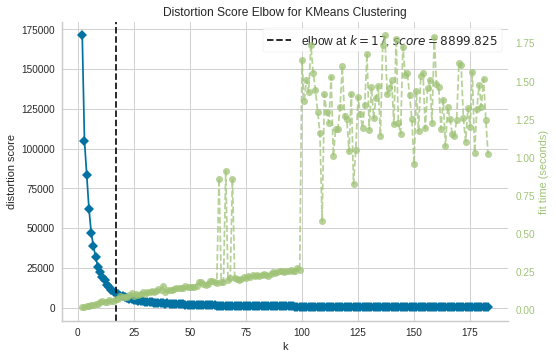

In [76]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k = (2, 184))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()

In [77]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 17)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

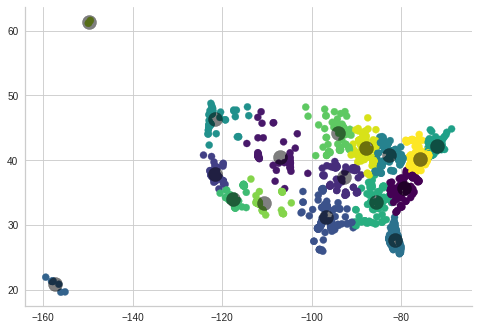

In [78]:
plt.scatter(X[:,1], X[:,0], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c = 'black', s = 200, alpha = 0.5);

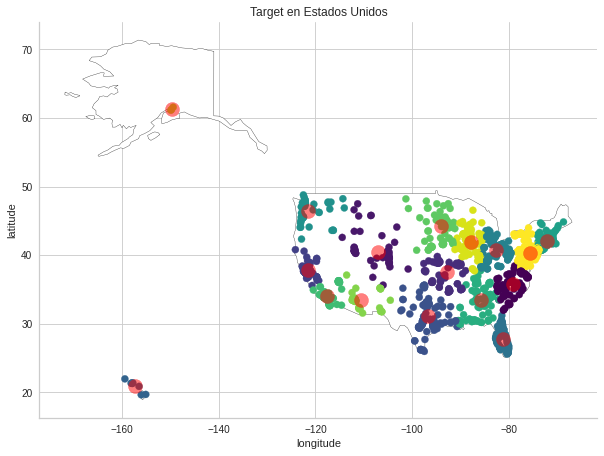

In [79]:
fig, gax = plt.subplots(figsize = (10,10))

world.query("name == 'United States of America'").plot(ax = gax, edgecolor = 'black', color = 'white')

plt.scatter(X[:,1], X[:,0], c=  y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 0], c = 'red', s = 200, alpha = 0.5);

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [80]:
d = kmeans.transform(X).round(2)
d = pd.DataFrame(d)
d

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,7.96,21.49,7.41,35.02,10.16,71.57,7.74,8.60,37.10,17.22,1.12,30.72,13.14,23.87,68.86,8.79,13.13
1,8.10,21.28,7.20,34.82,10.00,71.41,7.95,8.59,36.89,17.33,1.28,30.53,12.95,23.69,68.65,8.66,13.23
2,10.06,21.53,8.49,34.40,8.88,70.08,7.16,11.43,37.12,19.59,3.63,29.82,14.92,22.96,68.99,11.35,15.54
3,7.80,20.92,6.59,34.70,10.36,71.65,8.84,7.54,36.49,16.72,1.63,30.54,11.95,23.73,68.17,7.44,12.61
4,7.65,23.47,9.68,36.67,11.31,72.60,5.41,9.92,39.09,17.24,2.27,32.18,15.53,25.32,70.91,10.95,13.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1834,11.51,19.03,7.28,33.73,14.64,72.58,16.75,5.85,33.46,16.14,9.83,30.67,5.97,24.46,64.16,1.14,12.76
1835,11.54,18.94,7.19,33.65,14.55,72.49,16.74,5.91,33.39,16.22,9.81,30.58,5.90,24.36,64.09,1.13,12.84
1836,27.92,2.49,14.43,16.04,15.05,55.55,29.15,23.59,15.62,34.21,22.56,14.26,12.31,10.38,47.18,18.46,30.66
1837,26.11,2.34,12.48,17.03,12.82,56.27,27.03,22.04,17.48,32.75,20.55,14.55,11.19,9.70,49.19,17.00,29.10


In [81]:
distancias = d.min(axis = 1)
distancias.describe()

count    1839.000000
mean        1.857444
std         1.216694
min         0.010000
25%         1.000000
50%         1.660000
75%         2.430000
max         8.310000
dtype: float64

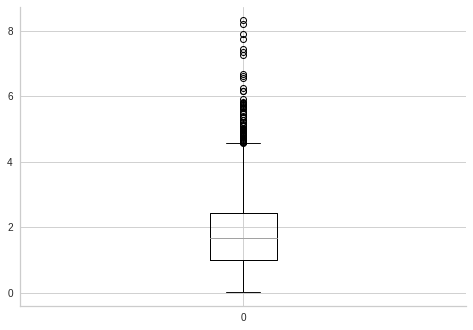

In [82]:
distancias = pd.DataFrame(distancias)
distancias.boxplot()

In [83]:
kmeans.inertia_

9065.67500907905

In [84]:
centros = pd.DataFrame(kmeans.cluster_centers_)
centros

,0,1
0,35.759741,-79.259560
1,40.477487,-107.032825
2,37.476997,-92.875861
3,37.876577,-121.514437
4,31.180298,-96.759743
5,20.945428,-157.312251
6,27.752233,-81.330744
7,40.816985,-82.761891
8,46.445732,-121.467081
9,42.139148,-72.066221


In [85]:
import pandas as pd
import io
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "geoapiExercises")

s = """Latitude   Longitude  
34.077733	-117.508140
40.816985	-82.761891
31.180298 -96.759743
27.752233 -81.330744
44.205905 -94.028525
42.139148 -72.066221
46.445732 -121.467081
20.945428 -157.312251
40.477487 -107.032825
37.476997 -92.875861
35.759741 -79.259560
61.312645 -149.676793
37.876577 -121.514437
33.515859 -85.725915
41.951347 -87.822609
33.446608 -110.674579
40.256166 -75.717883
"""

bodega_df = pd.read_csv(io.StringIO(s), delim_whitespace=True)

def city_state_country(row):
    coord = f"{row['Latitude']}, {row['Longitude']}"
    location = geolocator.reverse(coord, exactly_one = True)
    address = location.raw['address']
    city = address.get('city', '')
    state = address.get('state', '')
    country = address.get('country', '')
    row['city'] = city
    row['state'] = state
    row['country'] = country
    return row

bodega_df = bodega_df.apply(city_state_country, axis=1)
print(bodega_df)

     Latitude   Longitude               city           state        country
0   34.077733 -117.508140                         California  United States
1   40.816985  -82.761891                               Ohio  United States
2   31.180298  -96.759743                              Texas  United States
3   27.752233  -81.330744                            Florida  United States
4   44.205905  -94.028525                          Minnesota  United States
5   42.139148  -72.066221                      Massachusetts  United States
6   46.445732 -121.467081                         Washington  United States
7   20.945428 -157.312251                                     United States
8   40.477487 -107.032825                           Colorado  United States
9   37.476997  -92.875861                           Missouri  United States
10  35.759741  -79.259560  Town of Pittsboro  North Carolina  United States
11  61.312645 -149.676793                             Alaska  United States
12  37.87657

In [86]:
grupos = pd.DataFrame(kmeans.labels_)
grupos.value_counts()

16    251
15    171
4     168
7     153
11    140
9     122
6     116
10    116
12    115
0     108
2      88
3      80
1      74
8      69
13     57
5       8
14      3
dtype: int64

justifica tu respuesta tecnicamente

Decidí dejar 17 tiendas porque es el número perfecto para la figura del codo. Estos almacenes se ubican hasta a  8 unidades de cada punto.

**Encuentra la latitud y longitud de los almacenes, ¿qué ciudad es?**

```
      Latitude   Longitude               city           state        country

0   34.077733 -117.508140                         California  United States
1   40.816985  -82.761891                               Ohio  United States
2   31.180298  -96.759743                              Texas  United States
3   27.752233  -81.330744                            Florida  United States
4   44.205905  -94.028525                          Minnesota  United States
5   42.139148  -72.066221                      Massachusetts  United States
6   46.445732 -121.467081                         Washington  United States
7   20.945428 -157.312251                                     United States
8   40.477487 -107.032825                           Colorado  United States
9   37.476997  -92.875861                           Missouri  United States
10  35.759741  -79.259560  Town of Pittsboro  North Carolina  United States
11  61.312645 -149.676793                             Alaska  United States
12  37.876577 -121.514437                         California  United States
13  33.515859  -85.725915                            Alabama  United States
14  41.951347  -87.822609            Chicago        Illinois  United States
15  33.446608 -110.674579                            Arizona  United States
16  40.256166  -75.717883  Douglass Township    Pennsylvania  United States
```


**¿A cuántas tiendas abastece?** De mayor a menor el almacén 16 es el que  más tiendas tiene para abastecer (251) y el almacén 11 es el que menos (3) 

```
16    251
14    171
2     168
1     153
0     140
5     122
13    116
3     116
4     115
10    108
9      88
12     80
8      74
6      69
15     57
7       8
11      3
```

**¿Sabes cuánto tiempo tiene?** La tienda más alejada en stock está a 8 grados  (1 grado equivale a 111 km). A 50°, es un poco más de 1 grado en los depósitos, por lo que se tarda algo menos de 2 horas en llenar más de 50 l de depósitos (a una velocidad de unos 80 km/h). 

**¿Cómo eligió el número de almacenes?** Hice una curva que muestra el rendimiento (inercia) de los centroides y cómo disminuye a medida que aumenta el número de centros. Cuando llegas a 10, la tasa de cambio disminuye significativamente, aunque la flexibilidad máxima está entre 17 y 19 puntos. También consideré que si no había almacenes en  estados  fuera del país, el tiempo de entrega sería significativamente más largo, por lo que se necesitarían almacenes en esos lugares. Sin embargo, aquí hay menos tiendas y los centros las consideran parte de un grupo más grande fuera de la isla. Con estas consideraciones, he seleccionado 17 grupos con un almacén en cada isla, un tiempo medio de entrega inferior a dos horas y un máximo de 11.

2. **Adicionalmente, en el notebook notaras que al inicio exploramos los datos y los graficamos de manera simple, despues nos auxiliamos de una librería de datos geograficos.**


**¿Qué librerías nos pueden ayudar a graficar este tipo de datos?**

Geopy: esta biblioteca se utiliza para traducir la longitud y latitud de nuestros centroides a los estados de EE. UU. La geocodificación es un proceso informático que transforma la descripción de una dirección física en una ubicación en la tierra. En este sentido, geopyy es una biblioteca muy utilizada para la geocodificación. Creo que geopyha lo hace fácil. Geopy facilita el uso de las coordenadas de direcciones, ciudades, países y puntos de referencia para encontrar su lugar en el mundo geográfico. 

ipyleaflet: Esta es una biblioteca muy importante porque nos permite crear mapas interactivos en nuestro cuaderno. Esta biblioteca le permite administrar varias personalizaciones, como cargar mapas base, geojson y widgets. También ofrece una amplia variedad de tipos de mapas, incluidos coroplisados, datos de velocidad y vistas en paralelo. Como hablamos durante nuestra maestría, la forma en  que se presentan y muestran los datos es extremadamente importante, por lo que creo que crear mapas interactivos tiene mucho que ver con la experiencia del usuario al usar una base de datos. 

Geemap: Por lo que he leído sobre esta biblioteca, es un poco más precisa de usar que otras. Sin embargo, esto lo hace muy útil. La característica principal de Geomap es que es más para la ciencia y el análisis de datos utilizando Google Earth Engine (GEE). Aunque tiene otras funciones,  se utiliza específicamente para explorar el catálogo de imágenes satelitales de varios petabytes de  GEE con sus aplicaciones específicas y  datos de detección remota. Creo que es muy interesante y útil, porque el seguimiento remoto de fenómenos por satélite es sumamente importante en la toma de decisiones en situaciones de emergencia, como los incendios forestales.

**¿Consideras importante que se grafique en un mapa?, ¿por qué?**

Por supuesto, hay situaciones en las que sacar una carta es clave. Como ya mencioné, en la ciencia de datos no se trata solo de cómo limpia y procesa su conjunto de datos, sino también de cómo lo presenta al público. Si en este caso estamos hablando de las coordenadas donde se encuentran nuestras tiendas y almacenes, es muy probable que si presentamos estos números a nuestros grupos de interés, no signifique mucho para ellos. Finalmente, estos son números cuyo significado es difícil de imaginar. Por el contrario, si logramos mapear los datos usando Python y sus bibliotecas para visualizarlos mejor, claramente ayuda a tomar las decisiones correctas.

**Agrega las conclusiones**

Finalmente, después de completar esta tarea, podemos concluir que la información geográfica se puede encontrar en la información que recibimos de un cliente o socio. Esta información puede incluso ser la más importante para resolver el problema. En este sentido, es importante saber que existen muchas bibliotecas de python que nos ayudan a procesar, analizar y rastrear esta información geográfica mediante geocodificación. En concreto, en este ejercicio pudimos ubicar en un mapa todas las tiendas Target en Estados Unidos. Además, con la ayuda de K-means, pudimos agrupar estas tiendas en un grupo que divide el centro de tal manera que la distancia a este centro sea la menor posible. La curva Elbow nos permitió determinar que formar tres clusters con tres centroides era lo más eficiente. De esta forma y mediante geoenlaces, determinamos la ubicación de estos almacenes, la distancia entre ellos y el número de comercios atendidos.

**Referencias:**



*   Geopy (2022). Welcome to GeoPy's documentation!¶. Welcome to GeoPy's documentation! - GeoPy 2.2.0 documentation. Retrieved November 9, 2022, from https://geopy.readthedocs.io/en/stable/
*   GISGeography (2022, June 5). 15 python libraries for GIS and mapping. GIS Geography. Retrieved November 9, 2022, from https://gisgeography.com/python-libraries-gis-mapping/
*   Abdishakur (2019). Geocode with python. how to convert physical addresses to… | by ... TowardsDataScience. Retrieved November 9, 2022, from https://towardsdatascience.com/geocode-with-python-161ec1e62b89

